In [355]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [356]:
# Change dataframe viewing settings
pd.set_option("display.max_columns", None)

# Data Processing

In [357]:
# Load in dataframe
df = pd.read_csv("COVID-19BehaviorData_CAN_USA.csv")
df

,Index,RecordNo,endtime,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i5_health_99,i5a_health,i6_health,i7b_health,i8_health,i9_health,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_9,i12_health_10,i12_health_11,i12_health_12,i12_health_13,i12_health_14,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,i13_health,i14_health_1,i14_health_2,i14_health_3,i14_health_4,i14_health_5,i14_health_6,i14_health_7,i14_health_8,i14_health_9,i14_health_10,i14_health_96,i14_health_98,i14_health_99,i14_health_other,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_12,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,region_state,household_size,household_children,employment_status
0,0,CAN0,02/04/2020 08:25,week 1,0,1,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,Yes,Very easy,Very willing,Not at all,Always,Frequently,Always,Always,Frequently,Always,Always,,,Always,Always,Always,Always,Always,Frequently,Always,Always,Frequently,Always,20,,,,,,,,,,,,,,__NA__,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1.036370,Male,73,British Columbia / Colombie Britanique,1,0,Retired
1,1,CAN1,02/04/2020 08:34,week 1,0,6,0,"No, I have not","No, they have not",Yes,No,No,No,No,No,No,Frequently,No,No,Yes,Somewhat difficult,Somewhat willing,Not at all,Always,Frequently,Always,Not at all,Frequently,Always,Always,,,Always,Frequently,Always,Always,Frequently,Sometimes,Not at all,Not at all,Sometimes,Always,20,,,,,,,,,,,,,,__NA__,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1.016961,Female,37,British Columbia / Colombie Britanique,1,0,Unemployed
2,2,CAN2,02/04/2020 08:44,week 1,6,1,0,"No, I have not","No, they have not",No,No,No,No,Yes,No,No,Frequently,No,No,Yes,Somewhat easy,Very willing,Frequently,Frequently,Sometimes,Always,Always,Always,Frequently,Always,Frequently,Always,Always,Frequently,Always,Always,Always,Frequently,Not at all,Always,Rarely,Frequently,10,No,No,Yes,No,No,No,No,No,No,No,No,No,No,__NA__,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,1.003516,Male,25,Ontario,8 or more,2,Full time employment
3,3,CAN3,02/04/2020 08:44,week 1,1,1,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,Yes,Very easy,Very willing,Frequently,Frequently,Always,Always,Always,Always,Always,Always,,,Always,Always,Always,Always,Always,Always,Not at all,Always,Frequently,Always,8,,,,,,,,,,,,,,__NA__,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,1.002949,Male,66,Ontario,2,0,Retired
4,4,CAN4,02/04/2020 09:00,week 1,1,3,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,Yes,Somewhat easy,Very willing,Not at all,Sometimes,Rarely,Always,Always,Frequently,Always,Always,,,Always,Always,Always,Always,Always,Frequently,Not at all,Not at all,Not at all,Frequently,2,,,,,,,,,,,,,,__NA__,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1.028216,Female,25,British Columbia / Colombie Britanique,2,0,Unemployed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28820,28820,USA16977,29/09/2020 04:57,week 16,2,1,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,,,,Always,Always,Always,Always,Always,Frequently,Frequently,Always,Always,Always,Always,Always,Always,Always,Always,Frequently,Not at all,Not at all,Frequently,Always,9,No,No,No,No,No,No,No,No,No,No,No,No,Yes,__NA__,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1.335790,Female,27,Oklahoma,3,2,Full time employment
28821,28821,USA16978,29/09/2020 15:07,week 16,1,1,0,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,,,,Always,Freque

In [311]:
# Show the data types and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28825 entries, 0 to 28824
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               28825 non-null  int64  
 1   RecordNo            28825 non-null  object 
 2   endtime             28825 non-null  object 
 3   qweek               28825 non-null  object 
 4   i1_health           28825 non-null  int64  
 5   i2_health           28825 non-null  int64  
 6   i7a_health          28825 non-null  int64  
 7   i3_health           28825 non-null  object 
 8   i4_health           28825 non-null  object 
 9   i5_health_1         28825 non-null  object 
 10  i5_health_2         28825 non-null  object 
 11  i5_health_3         28825 non-null  object 
 12  i5_health_4         28825 non-null  object 
 13  i5_health_5         28825 non-null  object 
 14  i5_health_99        28825 non-null  object 
 15  i5a_health          28825 non-null  object 
 16  i6_h

In [312]:
# General processing
df = df.replace(" ", np.nan)
df = df.replace("__NA__", np.nan)
df = df.replace("Yes", '1')
df = df.replace("No", '0')
df = df.replace("Prefer not to say", np.nan)
df = df.replace("Don't know", np.nan)

In [313]:
''' Variables selected '''
''' Target Column'''
# i9_health

''' Predictor Columns'''
# i1_health, i2_health, i7a_health, i5_health_1
# i5_health_2, i5_health_3, 5_health_4, i5_health_5, i10_health, i11_health, 
# i12_health_1, i12_health_2, i12_health_3, i12_health_4,i12_health_5, i12_health_6,
# i12_health_7, i12_health_8, i12_health_11
# i12_health_15, i12_health_16, i12_health_17, i12_health_18, i12_health_19, i12_health_20
# i13_health, weight, age, gender, household_size(above 5/below 5)
# household_children (yes or no children), employment_status

' Predictor Columns'

In [314]:
# Based on selected columns above, rebuild dataframe
df = df[['i9_health', 'i1_health', 'i2_health', 'i7a_health', 'i5_health_1',
         'i5_health_2', 'i5_health_3', 'i5_health_4', 'i5_health_5', 'i10_health', 'i11_health', 
         'i12_health_1', 'i12_health_2', 'i12_health_3', 'i12_health_4','i12_health_5', 'i12_health_6',
         'i12_health_7', 'i12_health_8', 'i12_health_11','i12_health_15', 'i12_health_16', 'i12_health_17', 
         'i12_health_18', 'i12_health_19', 'i12_health_20', 'i13_health', 
         'weight', 'age', 'gender', 'household_size', 'household_children','employment_status']]

In [315]:
# Process target column
df['i9_health'] = df['i9_health'].replace('Not sure', 0).astype(float)

In [316]:
# Process categorical columns
df['household_size'] = df['household_size'].replace("8 or more", 8)
df['household_children'] = df['household_children'].replace('5 or more', 5)
df['household_size'] = df['household_size'].astype(float).apply(lambda x: 1 if x > 2 else 0)
df['household_children'] = df['household_children'].astype(float).apply(lambda x: 1 if x > 0 else 0)
df['i11_health'].map({"Not sure" : 1, "Neither willing nor unwilling" : 2, "Very unwilling" : 3, 
                      "Somewhat unwilling" : 4, "Somewhat willing" : 5, "Very willing" : 6}).value_counts()
df['i10_health'] = df['i10_health'].map({"Not sure" : 1, "Neither easy nor difficult" : 2, "Very easy" : 3, 
                                         "Somewhat easy" : 4, "Somewhat difficult" : 5, "Very difficult" : 6})
df['i11_health'] = df['i11_health'].map({"Not sure" : 1, "Neither willing nor unwilling" : 2, "Very unwilling" : 3, 
                                         "Somewhat unwilling" : 4, "Somewhat willing" : 5, "Very willing" : 6})
df['employment_status'] = df['employment_status'].apply(lambda x: 1 if x in ('Full time employment', 
                                                                             'Part time employment', 
                                                                             'Full time student') else 0)
scale_col = ['i12_health_1', 'i12_health_2', 'i12_health_3', 'i12_health_4', 'i12_health_5', 'i12_health_6', 
             'i12_health_7', 'i12_health_8', 'i12_health_11', 'i12_health_15', 'i12_health_16', 'i12_health_17', 
             'i12_health_18', 'i12_health_19', 'i12_health_20']
for col in scale_col:
    df[col] = df[col].map({"Not at all" : 1, "Rarely" : 2, "Sometimes" : 3, "Frequently" : 4, "Always" : 5})

In [324]:
# Clean records with Null values
df = df.dropna(how = 'any', axis = 0)

# Create dummies column for the only categorical column ('gender')
df = pd.get_dummies(df, columns = ['gender'])

,i9_health,i1_health,i2_health,i7a_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,i13_health,weight,age,gender,household_size,household_children,employment_status
0,1.0,0,1,1,0,0,0,0,0,3.0,6.0,1,5,4,5,5,4,5,5,5,5,4,5,5,4,5,20,1.036370,73,Male,0,0,0
1,1.0,0,6,0,1,0,0,0,0,5.0,5.0,1,5,4,5,1,4,5,5,5,4,3,1,1,3,5,20,1.016961,37,Female,0,0,0
2,1.0,6,1,0,0,0,0,0,1,4.0,6.0,4,4,3,5,5,5,4,5,5,5,4,1,5,2,4,10,1.003516,25,Male,1,1,1
3,1.0,1,1,1,0,0,0,0,0,3.0,6.0,4,4,5,5,5,5,5,5,5,5,5,1,5,4,5,8,1.002949,66,Male,0,0,0
4,1.0,1,3,1,0,0,0,0,0,4.0,6.0,1,3,2,5,5,4,5,5,5,5,4,1,1,1,4,2,1.028216,25,Female,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27854,0.0,200,59,1,0,0,0,0,0,2.0,2.0,4,4,4,4,5,4,4,4,4,4,4,4,4,4,4,2,2.669654,37,Male,1,1,0
27855,0.0,2,0,0,0,0,0,0,0,2.0,4.0,5,3,3,4,3,5,3,3,1,3,3,2,1,3,3,4,0.918933,21,Male,1,1,0
27856,1.0,2,1,0,0,0,0,0,0,3.0,5.0,5,5,5,5,5,5,1,5,4,5,2,3,5,5,4,75,4.712149,62,Male,1,1,0
27857,0.0,0,0,5,0,0,0,0,0,5.0,2.0,3,4,5,4,4,4,4,2,4,3,2,5,2,4,3,3,2.752358,30,Male,0,1,1


In [326]:
# Convert all the data types into float
ols = df.columns.tolist()
for col in cols:
    df[col] = df[col].astype('float')

In [333]:
# Output dataframe into CSV file
df.to_csv("Clean_data_for_model.csv", index = False)

# For original categorical columns and numeric columns

In [338]:
# Read in CSV file
df = pd.read_csv("COVID-19BehaviorData_CAN_USA.csv")

# Only clean out the Null values 
df = df.replace(" ", np.nan)
df = df.replace("__NA__", np.nan)
df

,Index,RecordNo,endtime,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i5_health_99,i5a_health,i6_health,i7b_health,i8_health,i9_health,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_9,i12_health_10,i12_health_11,i12_health_12,i12_health_13,i12_health_14,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,i13_health,i14_health_1,i14_health_2,i14_health_3,i14_health_4,i14_health_5,i14_health_6,i14_health_7,i14_health_8,i14_health_9,i14_health_10,i14_health_96,i14_health_98,i14_health_99,i14_health_other,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_12,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,region_state,household_size,household_children,employment_status
0,0,CAN0,02/04/2020 08:25,week 1,0,1,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,Yes,Very easy,Very willing,Not at all,Always,Frequently,Always,Always,Frequently,Always,Always,NaN,NaN,Always,Always,Always,Always,Always,Frequently,Always,Always,Frequently,Always,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1.036370,Male,73,British Columbia / Colombie Britanique,1,0,Retired
1,1,CAN1,02/04/2020 08:34,week 1,0,6,0,"No, I have not","No, they have not",Yes,No,No,No,No,No,No,Frequently,No,No,Yes,Somewhat difficult,Somewhat willing,Not at all,Always,Frequently,Always,Not at all,Frequently,Always,Always,NaN,NaN,Always,Frequently,Always,Always,Frequently,Sometimes,Not at all,Not at all,Sometimes,Always,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1.016961,Female,37,British Columbia / Colombie Britanique,1,0,Unemployed
2,2,CAN2,02/04/2020 08:44,week 1,6,1,0,"No, I have not","No, they have not",No,No,No,No,Yes,No,No,Frequently,No,No,Yes,Somewhat easy,Very willing,Frequently,Frequently,Sometimes,Always,Always,Always,Frequently,Always,Frequently,Always,Always,Frequently,Always,Always,Always,Frequently,Not at all,Always,Rarely,Frequently,10,No,No,Yes,No,No,No,No,No,No,No,No,No,No,NaN,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,1.003516,Male,25,Ontario,8 or more,2,Full time employment
3,3,CAN3,02/04/2020 08:44,week 1,1,1,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,Yes,Very easy,Very willing,Frequently,Frequently,Always,Always,Always,Always,Always,Always,NaN,NaN,Always,Always,Always,Always,Always,Always,Not at all,Always,Frequently,Always,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,1.002949,Male,66,Ontario,2,0,Retired
4,4,CAN4,02/04/2020 09:00,week 1,1,3,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,Yes,Somewhat easy,Very willing,Not at all,Sometimes,Rarely,Always,Always,Frequently,Always,Always,NaN,NaN,Always,Always,Always,Always,Always,Frequently,Not at all,Not at all,Not at all,Frequently,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1.028216,Female,25,British Columbia / Colombie Britanique,2,0,Unemployed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28820,28820,USA16977,29/09/2020 04:57,week 16,2,1,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Always,Always,Always,Always,Always,Frequently,Frequently,Always,Always,Always,Always,Always,Always,Always,Always,Frequently,Not at all,Not at all,Frequently,Always,9,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NaN,No,No,No

In [339]:
# Collect numeric columns
num_col = ['i1_health', 'i2_health', 'i7a_health', 'i5_health_1', 'i5_health_2', 'i5_health_3', 'i5_health_4', 
          'i5_health_5', 'i13_health', 'weight', 'age', 'household_size' ,'household_children']

In [342]:
# Collect categorical columns
cat_col = ['i9_health', 'i10_health', 'i11_health', 'i12_health_1', 'i12_health_2', 'i12_health_3', 
          'i12_health_4', 'i12_health_5', 'i12_health_6', 'i12_health_7', 'i12_health_8', 'i12_health_11', 'i12_health_15',
          'i12_health_16', 'i12_health_17', 'i12_health_18', 'i12_health_19', 'i12_health_20', 'gender', 'employment_status']

In [343]:
# categorical df
df_cat = df[cat_col]
df_cat

,i9_health,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,gender,employment_status
0,Yes,Very easy,Very willing,Not at all,Always,Frequently,Always,Always,Frequently,Always,Always,Always,Always,Frequently,Always,Always,Frequently,Always,Male,Retired
1,Yes,Somewhat difficult,Somewhat willing,Not at all,Always,Frequently,Always,Not at all,Frequently,Always,Always,Always,Frequently,Sometimes,Not at all,Not at all,Sometimes,Always,Female,Unemployed
2,Yes,Somewhat easy,Very willing,Frequently,Frequently,Sometimes,Always,Always,Always,Frequently,Always,Always,Always,Frequently,Not at all,Always,Rarely,Frequently,Male,Full time employment
3,Yes,Very easy,Very willing,Frequently,Frequently,Always,Always,Always,Always,Always,Always,Always,Always,Always,Not at all,Always,Frequently,Always,Male,Retired
4,Yes,Somewhat easy,Very willing,Not at all,Sometimes,Rarely,Always,Always,Frequently,Always,Always,Always,Always,Frequently,Not at all,Not at all,Not at all,Frequently,Female,Unemployed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28820,NaN,NaN,NaN,Always,Always,Always,Always,Always,Frequently,Frequently,Always,Always,Always,Frequently,Not at all,Not at all,Frequently,Always,Female,Full time employment
28821,NaN,NaN,NaN,Always,Frequently,Sometimes,Always,Always,Frequently,Sometimes,Always,Rarely,Always,Sometimes,Not at all,Not at all,Rarely,Sometimes,Female,Retired
28822,NaN,NaN,NaN,Not at all,Always,Always,Always,Always,Always,Always,Always,Always,Always,Always,Not at all,Always,Always,Always,Female,Full time employment
28823,NaN,NaN,NaN,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Male,Full time employment


In [344]:
# numeric df
df_num = df[num_col]
df_num

,i1_health,i2_health,i7a_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i13_health,weight,age,household_size,household_children
0,0,1,1,No,No,No,No,No,20,1.036370,73,1,0
1,0,6,0,Yes,No,No,No,No,20,1.016961,37,1,0
2,6,1,0,No,No,No,No,Yes,10,1.003516,25,8 or more,2
3,1,1,1,No,No,No,No,No,8,1.002949,66,2,0
4,1,3,1,No,No,No,No,No,2,1.028216,25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28820,2,1,1,No,No,No,No,No,9,1.335790,27,3,2
28821,1,1,0,No,No,No,No,No,5,1.413918,74,1,0
28822,4,0,0,No,No,No,No,No,12,1.044810,26,4,2
28823,1,0,1,No,No,No,No,No,3,2.919237,22,5,0


In [345]:
# Concateante together
df = df[cat_col].merge(right = df[num_col], left_index = True, right_index = True)
df

,i9_health,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,gender,employment_status,i1_health,i2_health,i7a_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i13_health,weight,age,household_size,household_children
0,Yes,Very easy,Very willing,Not at all,Always,Frequently,Always,Always,Frequently,Always,Always,Always,Always,Frequently,Always,Always,Frequently,Always,Male,Retired,0,1,1,No,No,No,No,No,20,1.036370,73,1,0
1,Yes,Somewhat difficult,Somewhat willing,Not at all,Always,Frequently,Always,Not at all,Frequently,Always,Always,Always,Frequently,Sometimes,Not at all,Not at all,Sometimes,Always,Female,Unemployed,0,6,0,Yes,No,No,No,No,20,1.016961,37,1,0
2,Yes,Somewhat easy,Very willing,Frequently,Frequently,Sometimes,Always,Always,Always,Frequently,Always,Always,Always,Frequently,Not at all,Always,Rarely,Frequently,Male,Full time employment,6,1,0,No,No,No,No,Yes,10,1.003516,25,8 or more,2
3,Yes,Very easy,Very willing,Frequently,Frequently,Always,Always,Always,Always,Always,Always,Always,Always,Always,Not at all,Always,Frequently,Always,Male,Retired,1,1,1,No,No,No,No,No,8,1.002949,66,2,0
4,Yes,Somewhat easy,Very willing,Not at all,Sometimes,Rarely,Always,Always,Frequently,Always,Always,Always,Always,Frequently,Not at all,Not at all,Not at all,Frequently,Female,Unemployed,1,3,1,No,No,No,No,No,2,1.028216,25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28820,NaN,NaN,NaN,Always,Always,Always,Always,Always,Frequently,Frequently,Always,Always,Always,Frequently,Not at all,Not at all,Frequently,Always,Female,Full time employment,2,1,1,No,No,No,No,No,9,1.335790,27,3,2
28821,NaN,NaN,NaN,Always,Frequently,Sometimes,Always,Always,Frequently,Sometimes,Always,Rarely,Always,Sometimes,Not at all,Not at all,Rarely,Sometimes,Female,Retired,1,1,0,No,No,No,No,No,5,1.413918,74,1,0
28822,NaN,NaN,NaN,Not at all,Always,Always,Always,Always,Always,Always,Always,Always,Always,Always,Not at all,Always,Always,Always,Female,Full time employment,4,0,0,No,No,No,No,No,12,1.044810,26,4,2
28823,NaN,NaN,NaN,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Male,Full time employment,1,0,1,No,No,No,No,No,3,2.919237,22,5,0


In [346]:
# Drop NaN records to form final dataframe
df_ori = df.dropna(how = 'any', axis = 0)
df_ori

,i9_health,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,gender,employment_status,i1_health,i2_health,i7a_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i13_health,weight,age,household_size,household_children
0,Yes,Very easy,Very willing,Not at all,Always,Frequently,Always,Always,Frequently,Always,Always,Always,Always,Frequently,Always,Always,Frequently,Always,Male,Retired,0,1,1,No,No,No,No,No,20,1.036370,73,1,0
1,Yes,Somewhat difficult,Somewhat willing,Not at all,Always,Frequently,Always,Not at all,Frequently,Always,Always,Always,Frequently,Sometimes,Not at all,Not at all,Sometimes,Always,Female,Unemployed,0,6,0,Yes,No,No,No,No,20,1.016961,37,1,0
2,Yes,Somewhat easy,Very willing,Frequently,Frequently,Sometimes,Always,Always,Always,Frequently,Always,Always,Always,Frequently,Not at all,Always,Rarely,Frequently,Male,Full time employment,6,1,0,No,No,No,No,Yes,10,1.003516,25,8 or more,2
3,Yes,Very easy,Very willing,Frequently,Frequently,Always,Always,Always,Always,Always,Always,Always,Always,Always,Not at all,Always,Frequently,Always,Male,Retired,1,1,1,No,No,No,No,No,8,1.002949,66,2,0
4,Yes,Somewhat easy,Very willing,Not at all,Sometimes,Rarely,Always,Always,Frequently,Always,Always,Always,Always,Frequently,Not at all,Not at all,Not at all,Frequently,Female,Unemployed,1,3,1,No,No,No,No,No,2,1.028216,25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27854,No,Neither easy nor difficult,Neither willing nor unwilling,Frequently,Frequently,Frequently,Frequently,Always,Frequently,Frequently,Frequently,Frequently,Frequently,Frequently,Frequently,Frequently,Frequently,Frequently,Male,Not working,200,59,1,No,No,No,No,No,2,2.669654,37,6,4
27855,No,Neither easy nor difficult,Somewhat unwilling,Always,Sometimes,Sometimes,Frequently,Sometimes,Always,Sometimes,Sometimes,Not at all,Sometimes,Sometimes,Rarely,Not at all,Sometimes,Sometimes,Male,Not working,2,0,0,No,No,No,No,No,4,0.918933,21,4,2
27856,Yes,Very easy,Somewhat willing,Always,Always,Always,Always,Always,Always,Not at all,Always,Frequently,Always,Rarely,Sometimes,Always,Always,Frequently,Male,Unemployed,2,1,0,No,No,No,No,No,75,4.712149,62,5,2
27857,No,Somewhat difficult,Neither willing nor unwilling,Sometimes,Frequently,Always,Frequently,Frequently,Frequently,Frequently,Rarely,Frequently,Sometimes,Rarely,Always,Rarely,Frequently,Sometimes,Male,Full time employment,0,0,5,No,No,No,No,No,3,2.752358,30,2,2


In [347]:
# Output dataframe into CSV file
df_ori.to_csv("Clean_Original_Data_for_EDA.csv", index = False)

# Questions to solve:
## 1. How to give values to "Always", "Not at all" , ... ? Should we do it based on context?


# Other Data Processing (optional) - syntax reference only if needed

In [12]:
# Convert string time to datetime
df['endtime'] = pd.to_datetime(df['endtime'])
df['endtime']

0       2020-02-04 08:25:00
1       2020-02-04 08:34:00
2       2020-02-04 08:44:00
3       2020-02-04 08:44:00
4       2020-02-04 09:00:00
                ...        
28820   2020-09-29 04:57:00
28821   2020-09-29 15:07:00
28822   2020-09-29 19:48:00
28823   2020-09-30 04:17:00
28824   2020-09-30 15:26:00
Name: endtime, Length: 28825, dtype: datetime64[ns]

In [13]:
# Clean week information
df['qweek'] = df['qweek'].str.strip('week ').astype(int)
df['qweek']

0         1
1         1
2         1
3         1
4         1
         ..
28820    16
28821    16
28822    16
28823    16
28824    16
Name: qweek, Length: 28825, dtype: int32

array([[<AxesSubplot:title={'center':'i1_health'}>,
        <AxesSubplot:title={'center':'i2_health'}>],
       [<AxesSubplot:title={'center':'i7a_health'}>,
        <AxesSubplot:title={'center':'i13_health'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

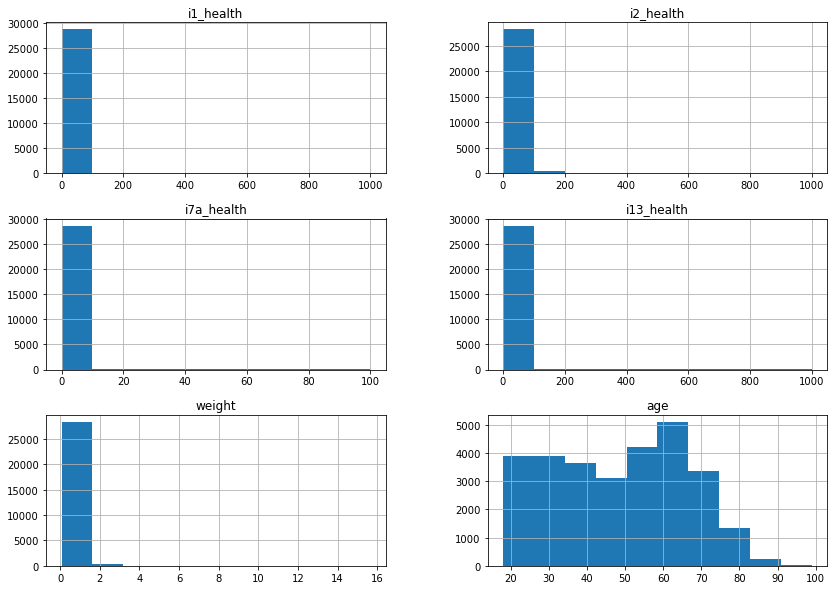

In [349]:
# EDA Exploration (historgram - auto detect numeric columns/value for plotting)
df.hist(figsize = (14, 10))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

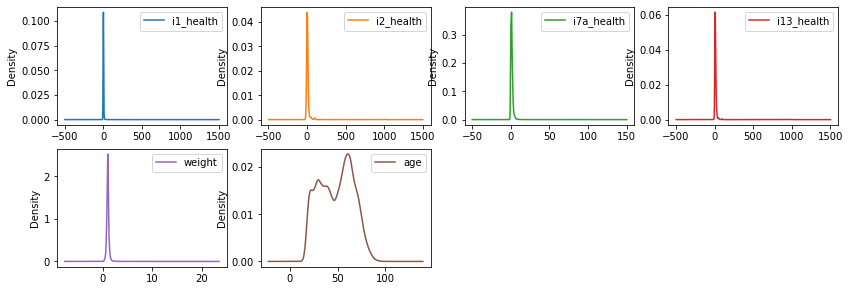

In [350]:
# EDA Exploration (density plot)
df.plot(figsize = (14, 10), kind = 'density', subplots = True, layout = (4,4), sharex = False)

i1_health         AxesSubplot(0.125,0.71587;0.168478x0.16413)
i2_health      AxesSubplot(0.327174,0.71587;0.168478x0.16413)
i7a_health     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
i13_health     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
weight           AxesSubplot(0.125,0.518913;0.168478x0.16413)
age           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

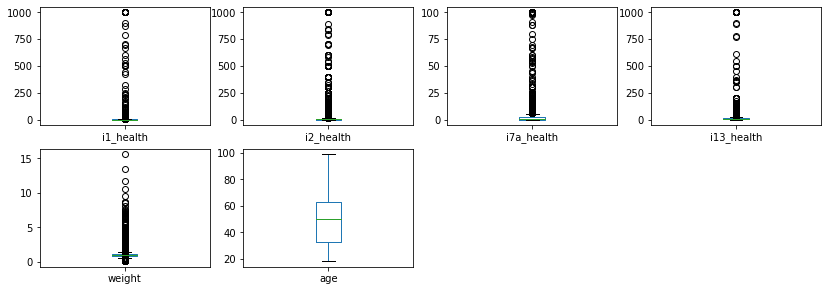

In [351]:
# EDA Exploration (Box-plot)
df.plot(figsize = (14, 10), kind = "box", subplots= True, layout = (4,4), sharex = False, sharey = False)

<AxesSubplot:xlabel='age', ylabel='household_size'>

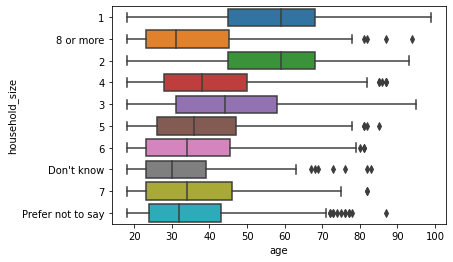

In [353]:
# EDA exploration (boxplot of numerical columns based on categorical variables)
sns.boxplot(x = df['age'], y = df['household_size'], data = df)

<AxesSubplot:xlabel='age', ylabel='i7a_health'>

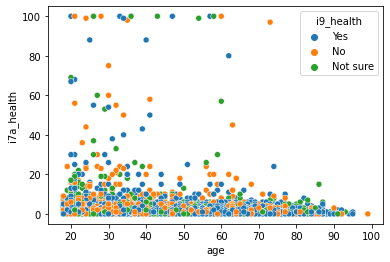

In [354]:
# EDA exploration (scatterplot)
sns.scatterplot(x = 'age', y = 'i7a_health', hue = 'i9_health', data = df)

# KNN Modeling and Analysis

In [358]:
# Read in CSV file
df = pd.read_csv("Clean_data_for_model.csv")
df

,i9_health,i1_health,i2_health,i7a_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_11,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,i13_health,weight,age,household_size,household_children,employment_status,gender_Female,gender_Male
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,1.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,20.0,1.036370,73.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,5.0,4.0,5.0,1.0,4.0,5.0,5.0,5.0,4.0,3.0,1.0,1.0,3.0,5.0,20.0,1.016961,37.0,0.0,0.0,0.0,1.0,0.0
2,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,6.0,4.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,1.0,5.0,2.0,4.0,10.0,1.003516,25.0,1.0,1.0,1.0,0.0,1.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,4.0,5.0,8.0,1.002949,66.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,1.0,3.0,2.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,1.0,1.0,1.0,4.0,2.0,1.028216,25.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26225,0.0,200.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.669654,37.0,1.0,1.0,0.0,0.0,1.0
26226,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,5.0,3.0,3.0,4.0,3.0,5.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,3.0,3.0,4.0,0.918933,21.0,1.0,1.0,0.0,0.0,1.0
26227,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,4.0,5.0,2.0,3.0,5.0,5.0,4.0,75.0,4.712149,62.0,1.0,1.0,0.0,0.0,1.0
26228,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,2.0,4.0,3.0,2.0,5.0,2.0,4.0,3.0,3.0,2.752358,30.0,0.0,1.0,1.0,0.0,1.0


In [360]:
# Determine the columns for X and columns for y
X = df.drop(["i9_health"], axis = 1)
y = df["i9_health"]

In [361]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [362]:
# Scale the data
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)

In [370]:
# Initialize k lvaues
k_values = np.arange(1, 50)

In [371]:
# Train to find the best value for k
param_grid = dict(n_neighbors = k_values)

In [372]:
# Create a KNN model object
model = KNeighborsRegressor()
kfd = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [373]:
# GridSearch
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = kfd)

In [374]:
# Output the GridSearch result
grid_result = grid.fit(rescaledX_train, y_train)

In [375]:
# Print the result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.157134 using {'n_neighbors': 49}


In [376]:
# Check some parameters of the grid search results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.287820 (0.009030) with: {'n_neighbors': 1}
-0.219372 (0.007647) with: {'n_neighbors': 2}
-0.197099 (0.007119) with: {'n_neighbors': 3}
-0.184917 (0.007240) with: {'n_neighbors': 4}
-0.177832 (0.007563) with: {'n_neighbors': 5}
-0.173943 (0.006090) with: {'n_neighbors': 6}
-0.170251 (0.006539) with: {'n_neighbors': 7}
-0.168060 (0.006788) with: {'n_neighbors': 8}
-0.166392 (0.006424) with: {'n_neighbors': 9}
-0.164959 (0.006384) with: {'n_neighbors': 10}
-0.163852 (0.006445) with: {'n_neighbors': 11}
-0.162694 (0.006123) with: {'n_neighbors': 12}
-0.162116 (0.006145) with: {'n_neighbors': 13}
-0.161570 (0.006023) with: {'n_neighbors': 14}
-0.161171 (0.006182) with: {'n_neighbors': 15}
-0.160874 (0.006152) with: {'n_neighbors': 16}
-0.160579 (0.006021) with: {'n_neighbors': 17}
-0.160290 (0.006186) with: {'n_neighbors': 18}
-0.159877 (0.006112) with: {'n_neighbors': 19}
-0.159622 (0.006020) with: {'n_neighbors': 20}
-0.159404 (0.005989) with: {'n_neighbors': 21}
-0.159067 (0.005979) w

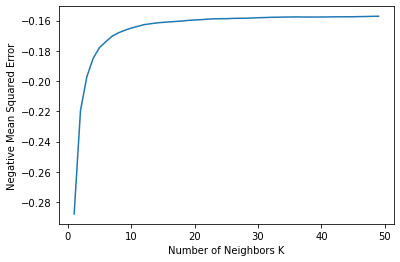

In [377]:
# Plot the score out for better view results
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative Mean Squared Error")
plt.show()

In [379]:
# With knowing the optimal value for K
scaler = StandardScaler(). fit(X_train)

rescaledX_train = scaler.transform(X_train)

In [381]:
# Fit in the best number of neighbors
model = KNeighborsRegressor(n_neighbors = 12)

In [382]:
# Fit into the scaled values.
model.fit(rescaledX_train, y_train)

KNeighborsRegressor(n_neighbors=12)

In [383]:
# Fill in the Test data
rescaledX_test = scaler.transform(X_test)

In [384]:
# Make the prediction using the trained model
estimates = model.predict(rescaledX_test)

In [385]:
# Check how good the model is
mean_squared_error(y_test, estimates)

0.16462081935549458

In [398]:
# Prepare for confusion matrix
est_result = list()
for i in estimates:
    if i < 0.5:
        est_result.append(0)
    else:
        est_result.append(1)

In [400]:
y_test = [float(i) for i in y_test]

In [401]:
# Show confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, est_result)
cm_df = pd.DataFrame(
    cm,
    index = ["Actual False", "Actual True"],
    columns = ["Predicted False", "Predicted True"]
)
cm_df

,Predicted False,Predicted True
Actual False,616,1198
Actual True,248,4496


In [403]:
# print accuracy score
acc_score = accuracy_score(y_test, est_result)
print("accuracy score is: ", acc_score * 100)

accuracy score is:  77.95059469350412


In [406]:
# Output classification report
print(classification_report(y_test, est_result))

              precision    recall  f1-score   support

         0.0       0.71      0.34      0.46      1814
         1.0       0.79      0.95      0.86      4744

    accuracy                           0.78      6558
   macro avg       0.75      0.64      0.66      6558
weighted avg       0.77      0.78      0.75      6558

